In [1]:
pip install pandas-ta


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install yfinance yahooquery pandas pandas-ta

  Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl.metadata (18 kB)
Using cached pandas-2.0.3-cp38-cp38-win_amd64.whl (10.8 MB)
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.9 MB 5.6 MB/s eta 0:00:01
   --------------------- ------------------ 2.1/3.9 MB 5.9 MB/s eta 0:00:01
   ------------------------------------- -- 3.7/3.9 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 6.1 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.3.0
    Uninstalling lxml-5.3.0:
      Successfully uninstalled lxml-5.3.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.1
    Uninstalling pandas-2.0.1:
      Successfully uninstalled pandas-2.0.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [5]:
pip install yfinance pandas numpy scikit-learn statsmodels tensorflow keras matplotlib

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.0 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.0 MB 8.4 MB/s eta 0:00:01
   ------------------- -------------------- 5.0/10.0 MB 8.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/10.0 MB 8.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/10.0 MB 7.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/10.0 MB 7.4 MB/s eta 0:00:01
   ------------------------------------- -- 9.4/10.0 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/276.5 MB 3.4 MB/s eta 0:01:23
   --------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.8.2 requires typing-extensions>=4.6.1; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.20.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
python-docx 1.1.2 requires typing-extensions>=4.9.0, but you have typing-extensions 4.5.0 which is incompatible.
torch 2.4.1+cu118 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [14]:
pip install talib-binary

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, Flatten
from yahooquery import Ticker
from sklearn.linear_model import LassoCV

In [21]:

# Download stock data

from yahooquery import Ticker
ticker = "AAPL"  # Example stock
aapl = Ticker(ticker)
df = aapl.history(period="1y")
if df.empty:
    raise ValueError("Failed to download AAPL data. Try again later.")
# df = yf.download(ticker, start="2023-01-01", end="2024-03-01")

In [87]:
df["RSI_7"] = ta.rsi(df["close"], length=7)
df["RSI_14"] = ta.rsi(df["close"], length=14)
df["RSI_21"] = ta.rsi(df["close"], length=21)
df["MACD_12_26"] = ta.macd(df["close"], fast=12, slow=26)["MACD_12_26_9"]
df["MACD_6_13"] = ta.macd(df["close"], fast=6, slow=13)["MACD_6_13_9"]
df["BBANDS_U"] = ta.bbands(df["close"], length=20)["BBU_20_2.0"]
df["BBANDS_L"] = ta.bbands(df["close"], length=20)["BBL_20_2.0"]
df["ATR_7"] = ta.atr(df["high"], df["low"], df["close"], length=7)
df["ATR_14"] = ta.atr(df["high"], df["low"], df["close"], length=14)
df["STOCH_K"] = ta.stoch(df["high"], df["low"], df["close"])["STOCHk_14_3_3"]
df["STOCH_D"] = ta.stoch(df["high"], df["low"], df["close"])["STOCHd_14_3_3"]
df["WILLR"] = ta.willr(df["high"], df["low"], df["close"], length=14)

# Compute the target variable (price change)
df["Change_1"] = df["close"].diff(1).shift(-1)/df["close"].shift(-1)
df["Change_2"] = df["close"].diff(2).shift(-2)/df["close"].shift(-2)
df["Change_3"] = df["close"].diff(3).shift(-3)/df["close"].shift(-3)
df.dropna(inplace=True)

In [89]:
df.head()

open        high         low       close     volume   
symbol date                                                                    
AAPL   2024-09-18  217.550003  222.710007  217.539993  220.690002   59894900  \
       2024-09-19  224.990005  229.820007  224.630005  228.869995   66781300   
       2024-09-20  229.970001  233.089996  227.619995  228.199997  318679900   
       2024-09-23  227.339996  229.449997  225.809998  226.470001   54146000   
       2024-09-24  228.649994  229.350006  225.729996  227.369995   43556100   

                     adjclose  dividends      RSI_7     RSI_14     RSI_21   
symbol date                                                                 
AAPL   2024-09-18  220.205353        0.0  47.850081  46.248576  46.678523  \
       2024-09-19  228.367386        0.0  68.706724  61.442884  59.539140   
       2024-09-20  227.698853        0.0  66.177605  59.948123  58.329223   
       2024-09-23  225.972656        0.0  59.571755  56.149695  55.283373   
       2024-09-24  226.870682        0.0  61.881153  57.652943  56.523485   

                   ...    BBANDS_U    BBANDS_L     ATR_7    ATR_14  Change_1   
symbol date        ...                                                         
AAPL   2024-09-18  ...  230.795712  215.987290  4.742073  4.582533  0.035741  \
       2024-09-19  ...  231.193146  215.836856  5.380521  4.962711 -0.002936   
       2024-09-20  ...  231.635945  215.761057  5.393507  5.004611 -0.007639   
       2024-09-23  ...  231.589748  215.770255  5.139616  4.893144  0.003958   
       2024-09-24  ...  231.616477  215.762525  4.920017  4.790204 -0.004418   

                   Change_2  Change_3    STOCH_K    STOCH_D      WILLR  
symbol date                                                             
AAPL   2024-09-18  0.032910  0.025522  21.122822  23.617626 -64.368399  
       2024-09-19 -0.010597 -0.006597  47.150954  29.808540  -9.283976  
       2024-09-20 -0.003650 -0.008084  66.946340  45.073372 -25.508606  
       2024-09-23 -0.000442  0.004615  76.891438  63.662911 -34.533103  
       2024-09-24  0.000659  0.001844  70.039998  71.292592 -29.838298  

[5 rows x 22 columns]

In [91]:
# Split data (90% train, 10% test)
split_index = int(len(df) * 0.9)
train, test = df.iloc[:split_index], df.iloc[split_index:]

# Extract features and targets
feature_cols = df.columns.difference(["Close", "Change_1", "Change_2", "Change_3"])
X_train, X_test = train[feature_cols], test[feature_cols]
y_train, y_test = train[["Change_1", "Change_2", "Change_3"]], test[["Change_1", "Change_2", "Change_3"]]

# Feature selection with Lasso Regression
lasso = LassoCV(cv=5, n_jobs=-1).fit(X_train, y_train["Change_1"])
# selected_features = X_train.columns[lasso.coef_ != 0]
selected_features = X_train.columns
X_train, X_test = X_train[selected_features], X_test[selected_features]

# Normalize data for ML models
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:


# ARIMA Model
arima_preds = []
for i in range(len(X_test)):
    model = ARIMA(train["close"], order=(5,1,0))
    arima_model = model.fit()
    forecast = arima_model.forecast(steps=3)
    arima_preds.append(forecast.values)
arima_preds = np.array(arima_preds)

# SVM Model
svm_models = [SVR(kernel="rbf") for _ in range(3)]
for i in range(3):
    svm_models[i].fit(X_train_scaled, y_train.iloc[:, i])
svm_preds = np.array([model.predict(X_test_scaled) for model in svm_models]).T

# LSTM Model
X_train_lstm = X_train_scaled.reshape(-1, 1, len(selected_features))
X_test_lstm = X_test_scaled.reshape(-1, 1, len(selected_features))

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, len(selected_features))),
    LSTM(50),
    Dense(3)
])
lstm_model.compile(optimizer="adam", loss="mae")
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=16, verbose=0)
lstm_preds = lstm_model.predict(X_test_lstm)

# CNN Model
X_train_cnn = X_train_scaled.reshape(-1, 1, len(selected_features))
X_test_cnn = X_test_scaled.reshape(-1, 1, len(selected_features))

cnn_model = Sequential([
    Conv1D(32, kernel_size=1, activation="relu", input_shape=(1, len(selected_features))),
    Flatten(),
    Dense(50, activation="relu"),
    Dense(3)
])
cnn_model.compile(optimizer="adam", loss="mae")
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=16, verbose=0)
cnn_preds = cnn_model.predict(X_test_cnn)

# Evaluation
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} MAE: {mae:.4f}")

evaluate(y_test, arima_preds, "ARIMA")
evaluate(y_test, svm_preds, "SVM")
evaluate(y_test, lstm_preds, "LSTM")
evaluate(y_test, cnn_preds, "CNN")

C:\Users\Estera\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Estera\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Estera\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Estera\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Estera\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next v

1/1 [==============================] - 0s 50ms/step
ARIMA MAE: 227.3595
SVM MAE: 0.0153
LSTM MAE: 0.0189
CNN MAE: 0.0419


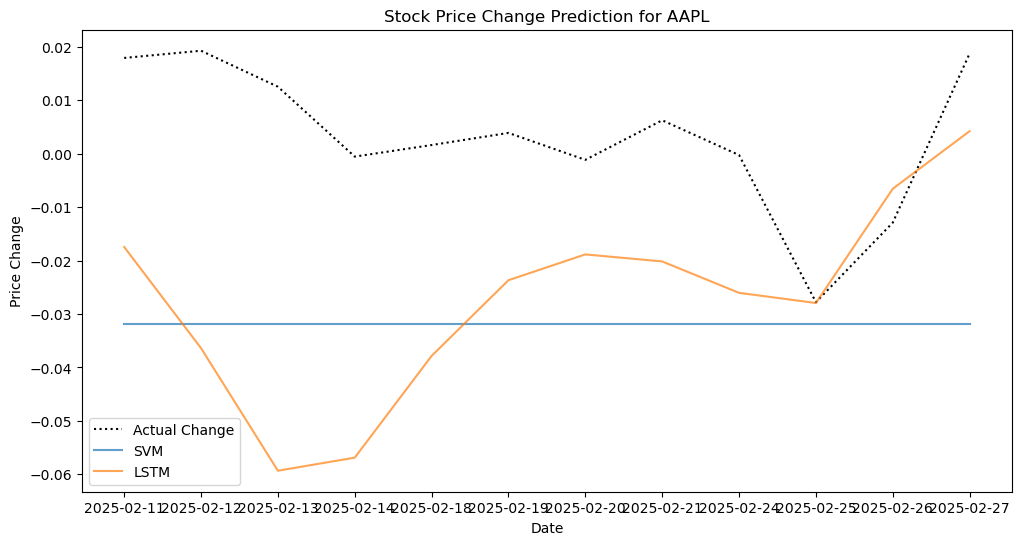

In [97]:
# Plot Results
y_labels = [str(date) for tick, date in y_test.index]
plt.figure(figsize=(12,6))
plt.plot(y_labels, y_test.iloc[:, 0], label="Actual Change", color="black", linestyle="dotted")
# plt.plot(y_labels, arima_preds[:, 0], label="ARIMA", alpha=0.7)
plt.plot(y_labels, svm_preds[:, 0]*10, label="SVM", alpha=0.7)
plt.plot(y_labels, lstm_preds[:, 0]*10, label="LSTM", alpha=0.7)
# plt.plot(y_labels, cnn_preds[:, 0]*10, label="CNN", alpha=0.7)
plt.legend()
plt.title(f"Stock Price Change Prediction for {ticker}")
plt.xlabel("Date")
plt.ylabel("Price Change")
plt.show()

In [43]:
y_test.index

MultiIndex([('AAPL', 2025-02-12),
            ('AAPL', 2025-02-13),
            ('AAPL', 2025-02-14),
            ('AAPL', 2025-02-18),
            ('AAPL', 2025-02-19),
            ('AAPL', 2025-02-20),
            ('AAPL', 2025-02-21),
            ('AAPL', 2025-02-24),
            ('AAPL', 2025-02-25),
            ('AAPL', 2025-02-26),
            ('AAPL', 2025-02-27),
            ('AAPL', 2025-02-28),
            ('AAPL', 2025-03-03),
            ('AAPL', 2025-03-04),
            ('AAPL', 2025-03-05),
            ('AAPL', 2025-03-06),
            ('AAPL', 2025-03-07),
            ('AAPL', 2025-03-10),
            ('AAPL', 2025-03-11),
            ('AAPL', 2025-03-12),
            ('AAPL', 2025-03-13),
            ('AAPL', 2025-03-14),
            ('AAPL', 2025-03-17)],
           names=['symbol', 'date'])